In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
import opto_util as opto
from matplotlib.ticker import FormatStrFormatter
import importlib
mpl.style.use('classic')
%matplotlib inline

In [2]:
plt.rcParams.update({
    'font.sans-serif': 'arial',
    'font.family': 'sans-serif'
})

In [3]:
full_df=pd.read_csv('20210415_full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,24,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
intKclusters=pd.read_csv('interneuron_Kclusters_1203.csv')
full_df = pd.merge(full_df, intKclusters,  how='left', left_on=['exp_id','headstage'], right_on = ['experiment','headstage'])
full_df.Kcluster.unique()

array([ 1., nan,  0.,  2.])

In [5]:
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]
print (np.shape(standard_df))

(16286, 85)


In [6]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]
Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']

In [7]:
Rorb_L23pyr=Rorb[(Rorb.post_layer==2) & (Rorb.post_class=='pyramidal')]
Penk_L23pyr=PenkKv[(PenkKv.post_layer==2) & (PenkKv.post_class=='pyramidal')]
Tlx3_L23pyr=Tlx3Kv[(Tlx3Kv.post_layer==2) & (Tlx3Kv.post_class=='pyramidal')]
Sst_L23pyr=Sst[(Sst.post_layer==2) & (Sst.post_class=='pyramidal')]
Pvalb_L23pyr=PvalbKv[(PvalbKv.post_layer==2) & (PvalbKv.post_class=='pyramidal')]

Rorb_L23fsi=Rorb[(Rorb.post_layer==2) & (Rorb.Kcluster==1)]
Penk_L23fsi=PenkKv[(PenkKv.post_layer==2) & (PenkKv.Kcluster==1)]
Tlx3_L23fsi=Tlx3Kv[(Tlx3Kv.post_layer==2) & (Tlx3Kv.Kcluster==1)]
Sst_L23fsi=Sst[(Sst.post_layer==2) & (Sst.Kcluster==1)]
Pvalb_L23fsi=PvalbKv[(PvalbKv.post_layer==2) & (PvalbKv.Kcluster==1)]

In [8]:
min_probed=0
x_bins=np.arange(0,701,100)
y_bins=np.arange(50,1051,100)
prob_matrix=opto.cnx_prob_2d(Rorb_L23pyr, ['excitatory'], x_bins, y_bins, 0)
Rorb_L23pyr=opto.assign_est_cnx_prob_2d(Rorb_L23pyr, x_bins, y_bins, prob_matrix)

/Users/travish/Desktop/2p_opto_nbs/opto_util.py:40: RuntimeWarning: invalid value encountered in true_divide
  H_prob=H_cnx/H
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
prob_matrix=opto.cnx_prob_2d(Penk_L23pyr, ['excitatory'], x_bins, y_bins, min_probed)
Penk_L23pyr=opto.assign_est_cnx_prob_2d(Penk_L23pyr, x_bins, y_bins, prob_matrix)
prob_matrix=opto.cnx_prob_2d(Tlx3_L23pyr, ['excitatory'], x_bins, y_bins, min_probed)
Tlx3_L23pyr=opto.assign_est_cnx_prob_2d(Tlx3_L23pyr, x_bins, y_bins, prob_matrix)

In [10]:
prob_matrix=opto.cnx_prob_2d(Rorb_L23fsi, ['excitatory'], x_bins, y_bins, min_probed)
Rorb_L23fsi=opto.assign_est_cnx_prob_2d(Rorb_L23fsi, x_bins, y_bins, prob_matrix)
prob_matrix=opto.cnx_prob_2d(Penk_L23fsi, ['excitatory'], x_bins, y_bins, min_probed)
Penk_L23fsi=opto.assign_est_cnx_prob_2d(Penk_L23fsi, x_bins, y_bins, prob_matrix)
prob_matrix=opto.cnx_prob_2d(Tlx3_L23fsi, ['excitatory'], x_bins, y_bins, min_probed)
Tlx3_L23fsi=opto.assign_est_cnx_prob_2d(Tlx3_L23fsi, x_bins, y_bins, prob_matrix)

In [11]:
prob_matrix=opto.cnx_prob_2d(Pvalb_L23pyr, ['inhibitory'], x_bins, y_bins, min_probed)
Pvalb_L23pyr=opto.assign_est_cnx_prob_2d(Pvalb_L23pyr, x_bins, y_bins, prob_matrix)
prob_matrix=opto.cnx_prob_2d(Sst_L23pyr, ['inhibitory'], x_bins, y_bins, min_probed)
Sst_L23pyr=opto.assign_est_cnx_prob_2d(Sst_L23pyr, x_bins, y_bins, prob_matrix)

In [12]:
prob_matrix=opto.cnx_prob_2d(Pvalb_L23fsi, ['inhibitory'], x_bins, y_bins, min_probed)
Pvalb_L23fsi=opto.assign_est_cnx_prob_2d(Pvalb_L23fsi, x_bins, y_bins, prob_matrix)
prob_matrix=opto.cnx_prob_2d(Sst_L23fsi, ['inhibitory'], x_bins, y_bins, min_probed)
Sst_L23fsi=opto.assign_est_cnx_prob_2d(Sst_L23fsi, x_bins, y_bins, prob_matrix)

In [13]:
##create a dataframe with all ordered pairs of tested presynaptic cells converging to a postsynaptic cell
##these functions may take a little time
Rorb_L23pyr_ordered_conv=opto.make_ordered_conv_df(Rorb_L23pyr) 

In [14]:
Penk_L23pyr_ordered_conv=opto.make_ordered_conv_df(Penk_L23pyr)
Tlx3_L23pyr_ordered_conv=opto.make_ordered_conv_df(Tlx3_L23pyr)

In [15]:
Rorb_L23fsi_ordered_conv=opto.make_ordered_conv_df(Rorb_L23fsi)
Penk_L23fsi_ordered_conv=opto.make_ordered_conv_df(Penk_L23fsi)
Tlx3_L23fsi_ordered_conv=opto.make_ordered_conv_df(Tlx3_L23fsi)

In [16]:
Pvalb_L23pyr_ordered_conv=opto.make_ordered_conv_df(Pvalb_L23pyr)
Sst_L23pyr_ordered_conv=opto.make_ordered_conv_df(Sst_L23pyr)
Pvalb_L23fsi_ordered_conv=opto.make_ordered_conv_df(Pvalb_L23fsi)
Sst_L23fsi_ordered_conv=opto.make_ordered_conv_df(Sst_L23fsi)

In [18]:
df_list=[Penk_L23pyr_ordered_conv, Rorb_L23pyr_ordered_conv, Tlx3_L23pyr_ordered_conv]
for df in df_list:
    print ('predicted convergence motifs: ',np.nansum(df.conv_prob))
    conv=df[(df.cnx_i=='excitatory') & (df.cnx_j=='excitatory')]
    print ('observed convergeence motifs: ',np.shape(conv)[0])

predicted convergence motifs:  13.757340614968236
observed convergeence motifs:  12
predicted convergence motifs:  681.9943025218652
observed convergeence motifs:  888
predicted convergence motifs:  190.72398843850948
observed convergeence motifs:  256


In [20]:
importlib.reload(opto)

<module 'opto_util' from '/Users/travish/Desktop/2p_opto_nbs/opto_util.py'>

In [23]:
Penk_L23pyr_ordered_conv.columns

Index(['name', 'MP_i', 'MP_j', 'prepre_dx', 'prepre_dy', 'prepre_dz',
       'prepre_dxyz', 'pia_i', 'pia_j', 'x_ap_i', 'x_ap_j', 'amp_i', 'amp_j',
       'cnx_i', 'cnx_j', 'post_pia', 'post_layer', 'post_class', 'conv_prob',
       'post_depth_i', 'pre_depth_i', 'pre_depth_j', 'xyz_dist_i',
       'xyz_dist_j', 'abs_x'],
      dtype='object')

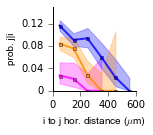

In [21]:
fs=10
tick_size=5
font='arial'
df_list=[Penk_L23pyr_ordered_conv, Rorb_L23pyr_ordered_conv, Tlx3_L23pyr_ordered_conv]
tags=['Penk_L23PC','Rorb_L23PC','Tlx3_L23PC']
colors=['magenta','blue','darkorange']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,601,100)

for df in df_list:
    color=colors[i]
    tag=tags[i]
    df['abs_x']=abs(df['prepre_dx'])
    i_cnx=df[df.cnx_i=='excitatory']
    conv=i_cnx[i_cnx.cnx_j=='excitatory']
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'abs_x',['excitatory'],bins)
    opto.rate_ci_probed_cnx_x(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'], min_probed=20,alpha=0.3, ls='solid')
    i+=1
    
ax.axis([0,600,0,0.15])
ax.set_xlabel(r'i to j hor. distance ($\mu$m)', fontsize=fs, fontname=font)
ax.set_ylabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('exc_inter_x_converge.svg')


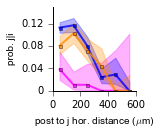

In [26]:
fs=10
tick_size=5
font='arial'
df_list=[Penk_L23pyr_ordered_conv, Rorb_L23pyr_ordered_conv, Tlx3_L23pyr_ordered_conv]

colors=['magenta','blue','darkorange']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,601,100)
tags=['Penk_L23PC','Rorb_L23PC','Tlx3_L23PC']

for df in df_list:
    color=colors[i]
    df['abs_xj']=abs(df['x_ap_j'])
    i_cnx=df[df.cnx_i=='excitatory']
    div=i_cnx[i_cnx.cnx_j=='excitatory']
    jx_dist=opto.frac_ci_j_give_i(i_cnx,'abs_xj',['excitatory'],bins)
    opto.rate_ci_probed_cnx_x(ax, color, opto.midPoints(bins), jx_dist['probed'], jx_dist['conv'], min_probed=20,alpha=0.3, ls='solid')
    i+=1
    
ax.axis([0,600,0,0.15])
ax.set_xlabel(r'post to j hor. distance ($\mu$m)', fontsize=fs, fontname=font)
ax.set_ylabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('exc_postToj_x_converge.svg')


/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_68625/2386247425.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs_x']=abs(df['prepre_dx'])
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_68625/2386247425.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs_x']=abs(df['prepre_dx'])
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_68625/2386247425.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

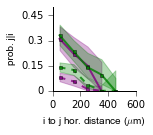

In [28]:
fs=10
tick_size=5
font='arial'
dfP=Pvalb_L23pyr_ordered_conv
dfS=Sst_L23pyr_ordered_conv
dfPL23=dfP[(dfP.pia_i<330) & (dfP.pia_j<330)]
dfSL23=dfS[(dfS.pia_i<330) & (dfS.pia_j<330)]
dfPtrans=dfP[(dfP.pia_i>330) & (dfP.pia_j>330)]
dfStrans=dfS[(dfS.pia_i>330) & (dfS.pia_j>330)]
df_list=[dfPL23,dfSL23,dfPtrans,dfStrans]
colors=['purple','green','purple','green']
styles=['solid','solid','dashed','dashed']
tags=['L23Pvalb','L23Sst','transPvalb','transSst']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,501,100)

for df in df_list:
    df['abs_x']=abs(df['prepre_dx'])
    color=colors[i]
    tag=tags[i]
    style=styles[i]
    i_cnx=df[df.cnx_i=='inhibitory']
    div=i_cnx[i_cnx.cnx_j=='inhibitory']
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'abs_x',['inhibitory'],bins)
    opto.rate_ci_probed_cnx_x(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'], min_probed=12,alpha=0.3, ls=style)
    i+=1
    
ax.axis([0,600,0,0.5])
ax.set_xlabel(r'i to j hor. distance ($\mu$m)', fontsize=fs, fontname=font)
ax.set_ylabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('inh_inter_x_converge.svg')


/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_68625/2447483905.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs_xj']=abs(df['x_ap_j'])
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_68625/2447483905.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs_xj']=abs(df['x_ap_j'])
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_68625/2447483905.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

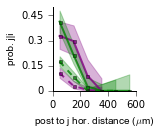

In [29]:
fs=10
tick_size=5
font='arial'
dfP=Pvalb_L23pyr_ordered_conv
dfS=Sst_L23pyr_ordered_conv
dfPL23=dfP[(dfP.pia_i<330) & (dfP.pia_j<330)]
dfSL23=dfS[(dfS.pia_i<330) & (dfS.pia_j<330)]
dfPtrans=dfP[(dfP.pia_i>330) & (dfP.pia_j>330)]
dfStrans=dfS[(dfS.pia_i>330) & (dfS.pia_j>330)]
df_list=[dfPL23,dfSL23,dfPtrans,dfStrans]
colors=['purple','green','purple','green']
styles=['solid','solid','dashed','dashed']
tags=['L23Pvalb','L23Sst','transPvalb','transSst']
i=0
fig,ax=plt.subplots()
bins=np.arange(0,601,100)


for df in df_list:
    df['abs_xj']=abs(df['x_ap_j'])
    color=colors[i]
    style=styles[i]
    i_cnx=df[df.cnx_i=='inhibitory']
    ij_dist=opto.frac_ci_j_give_i(i_cnx,'abs_xj',['inhibitory'],bins)
    opto.rate_ci_probed_cnx_x(ax, color, opto.midPoints(bins), ij_dist['probed'], ij_dist['conv'], min_probed=20,alpha=0.3, ls=style)
    i+=1
    
ax.axis([0,600,0,0.5])
ax.set_xlabel(r'post to j hor. distance ($\mu$m)', fontsize=fs, fontname=font)
ax.set_ylabel('prob. j|i', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
#plt.savefig('inh_xj_converge.svg')


Penk to L2/3pyr
12 pairs
pearson stats:  (0.5316249873722099, 0.07526031663670033)
spearman stats:  SpearmanrResult(correlation=0.6395759717314488, pvalue=0.025119356617596143)


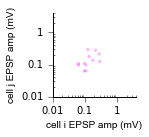

Rorb to L2/3pyr
850 pairs
pearson stats:  (0.010640243051104337, 0.7567389163940921)
spearman stats:  SpearmanrResult(correlation=0.01345231094961112, pvalue=0.6953246294532902)


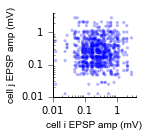

Tlx3 to L2/3pyr
246 pairs
pearson stats:  (-0.014151208214348801, 0.8252219761619224)
spearman stats:  SpearmanrResult(correlation=-0.013547460466076508, pvalue=0.8325665026823816)


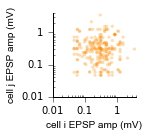

Penk to L2/3fsi
258 pairs
pearson stats:  (0.07464935771789079, 0.23212930764432516)
spearman stats:  SpearmanrResult(correlation=0.14122021335974233, pvalue=0.02328661226152429)


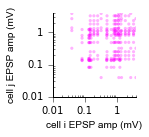

Rorb to L2/3fsi
64 pairs
pearson stats:  (-0.20589733781820257, 0.10262569677810274)
spearman stats:  SpearmanrResult(correlation=-0.17307913173308834, pvalue=0.17140907370552716)


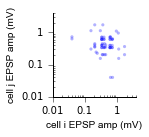

Tlx3 to L2/3fsi
22 pairs
pearson stats:  (-0.19894821258534534, 0.37475593542233826)
spearman stats:  SpearmanrResult(correlation=-0.13538640325392215, pvalue=0.5480213653503823)


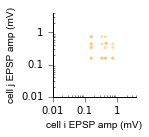

In [39]:
fs=10
tick_size=5
font='arial'
df_list=[Penk_L23pyr_ordered_conv,Rorb_L23pyr_ordered_conv,Tlx3_L23pyr_ordered_conv,
        Penk_L23fsi_ordered_conv,Rorb_L23fsi_ordered_conv,Tlx3_L23fsi_ordered_conv]
tags=['Penk to L2/3pyr', 'Rorb to L2/3pyr', 'Tlx3 to L2/3pyr', 'Penk to L2/3fsi', 'Rorb to L2/3fsi', 'Tlx3 to L2/3fsi']
colors=['magenta','blue','darkorange','magenta','blue','darkorange']
i=0

for df in df_list:
    color=colors[i]

    df=df.dropna(subset=['amp_i', 'amp_j'])
    i_cnx=df[df.cnx_i=='excitatory']
    conv=i_cnx[i_cnx.cnx_j=='excitatory']
    print (tags[i])
    print (np.shape(conv)[0], 'pairs')
    print ('pearson stats: ', stats.pearsonr(np.log(conv.amp_i),np.log(conv.amp_j)))
    print ('spearman stats: ', stats.spearmanr(np.log(conv.amp_i),np.log(conv.amp_j)))
    fig,ax=plt.subplots()
    ax.scatter(conv.amp_i, conv.amp_j, facecolor=color,alpha=0.3,edgecolor='none',s=10)
    ax.axis([0.01,4,0.01,4])
    ax.set_xlabel('cell i EPSP amp (mV)', fontsize=fs, fontname=font)
    ax.set_ylabel('cell j EPSP amp (mV)', fontsize=fs, fontname=font)
    plt.xscale('log')
    plt.yscale('log')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
    ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

    fig.set_figheight(1.5)
    fig.set_figwidth(1.5)
    plt.show()
    i+=1
    



Sst to L2/3pyr
454 pairs
pearson stats:  (0.18368266494605665, 8.266807204769129e-05)
spearman stats:  SpearmanrResult(correlation=0.19062843577369654, pvalue=4.348769125617107e-05)


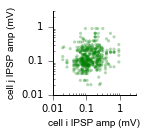

Pvalb to L2/3pyr
192 pairs
pearson stats:  (0.0019116287290572992, 0.9790058039826837)
spearman stats:  SpearmanrResult(correlation=0.013500114925273128, pvalue=0.8525623726195516)


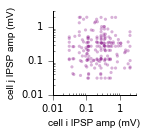

Sst to L2/3fsi
56 pairs
pearson stats:  (0.04265404383964907, 0.7549367773775951)
spearman stats:  SpearmanrResult(correlation=0.29091658650542807, pvalue=0.029614762430267432)


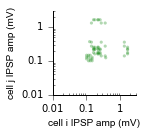

Pvalb to L2/3fsi
106 pairs
pearson stats:  (0.02575863163536894, 0.7932440706687126)
spearman stats:  SpearmanrResult(correlation=0.00488016593573523, pvalue=0.9604021548783236)


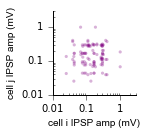

In [40]:
fs=10
tick_size=5
font='arial'
df_list=[Sst_L23pyr_ordered_conv, Pvalb_L23pyr_ordered_conv, Sst_L23fsi_ordered_conv, Pvalb_L23fsi_ordered_conv]
tags=['Sst to L2/3pyr', 'Pvalb to L2/3pyr', 'Sst to L2/3fsi', 'Pvalb to L2/3fsi']
colors=['green','purple','green', 'purple']
i=0



for df in df_list:
    color=colors[i]

    df=df.dropna(subset=['amp_i', 'amp_j'])
    i_cnx=df[df.cnx_i=='inhibitory']
    conv=i_cnx[i_cnx.cnx_j=='inhibitory']
    print (tags[i])
    print (np.shape(conv)[0], 'pairs')
    print ('pearson stats: ', stats.pearsonr(np.log(conv.amp_i*-1),np.log(conv.amp_j*-1)))
    print ('spearman stats: ', stats.spearmanr(np.log(conv.amp_i*-1),np.log(conv.amp_j*-1)))
    fig,ax=plt.subplots()
    ax.scatter(conv.amp_i*-1, conv.amp_j*-1, facecolor=color,alpha=0.3,edgecolor='none',s=10)
    ax.axis([0.01,3,0.01,3])
    ax.set_xlabel('cell i IPSP amp (mV)', fontsize=fs, fontname=font)
    ax.set_ylabel('cell j IPSP amp (mV)', fontsize=fs, fontname=font)
    plt.xscale('log')
    plt.yscale('log')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
    ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

    fig.set_figheight(1.5)
    fig.set_figwidth(1.5)
    plt.show()
    i+=1
    

